## Workspace setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.7/342.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.6/718.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00


In [ ]:
!cp drive/MyDrive/ZPS/WAWTPC/*.py /content

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import importlib
import uproot
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib import colors

## Data loading

### Load data from Tracks tree made with tpcReco

In [ ]:
dataDirectory = "drive/MyDrive/ZPS/"
dataFile = "TrackTree.root" # Tree file name

treeName = ":trackTree"
inputObj = dataDirectory+dataFile+treeName

with uproot.open(inputObj) as file:
    array = file["track"].array(library="pd")
    df = ak.to_dataframe(array)
    #columns = df.columns
    #columnsClean = [aCol[0] for aCol in columns]
    #df.columns = columnsClean

df_RECO = df.rename(columns={'xVtx':'RECO_StartPosX',
    'yVtx':'RECO_StartPosY',
    'zVtx':'RECO_StartPosZ',
    'xAlphaEnd':'RECO_StopPosX_Part1',
    'yAlphaEnd':'RECO_StopPosY_Part1',
    'zAlphaEnd':'RECO_StopPosZ_Part1',
    'xCarbonEnd':'RECO_StopPosX_Part2',
    'yCarbonEnd':'RECO_StopPosY_Part2',
    'zCarbonEnd':'RECO_StopPosZ_Part2'})

df_RECO.describe()

eventId      frameId     eventType        length  \
count  10000.000000  10000.00000  1.000000e+04  10000.000000   
mean     999.500000   4999.50000  6.150233e+07     47.081422   
std      577.379067   2886.89568  3.450202e+08     33.333784   
min        0.000000      0.00000  0.000000e+00      0.000000   
25%      499.750000   2499.75000  3.000000e+00     20.232110   
50%      999.500000   4999.50000  3.000000e+00     41.062809   
75%     1499.250000   7499.25000  3.000000e+00     66.291721   
max     1999.000000   9999.00000  1.996829e+09    232.170380   

       horizontalLostLength  verticalLostLength   alphaEnergy  carbonEnergy  \
count          1.000000e+04        1.000000e+04  10000.000000  10000.000000   
mean                    inf                 inf      2.315263      0.828339   
std                     NaN                 NaN      1.506044      0.679085   
min            7.507170e+01        6.000000e+00      0.000000      0.000000   
25%            1.206370e+02        7.198279e+00      1.097929      0.266214   
50%            1.957672e+02        9.112588e+00      2.217678      0.795471   
75%            4.335570e+02        1.197048e+01      3.367686      1.206827   
max                     inf                 inf      8.358563      4.993041   

         alphaRange   carbonRange  ...  RECO_StopPosY_Part1  \
count  10000.000000  10000.000000  ...         10000.000000   
mean      40.961539      7.420127  ...            -1.468210   
std       30.515487      4.539466  ...            31.535233   
min        0.000000      0.000000  ...          -413.126923   
25%       17.397787      4.932248  ...           -14.440137   
50%       34.709543      8.511467  ...            -0.837107   
75%       58.175583     10.445347  ...            13.022046   
max      222.409698     23.430000  ...           349.795593   

       RECO_StopPosZ_Part1  RECO_StopPosX_Part2  RECO_StopPosY_Part2  \
count         10000.000000         10000.000000          9692.000000   
mean            -50.611233            -0.858938            -1.222296   
std              22.271717            57.791432            22.331075   
min            -106.196236          -232.881287          -413.126923   
25%             -65.363438           -49.800436            -8.898387   
50%             -59.474838             0.000000            -0.123258   
75%             -42.621325            47.662728             8.346113   
max              84.720078           288.008789           349.795593   

       RECO_StopPosZ_Part2   total_mom_x  total_mom_y   total_mom_z  \
count         10000.000000  10000.000000  9692.000000  10000.000000   
mean            -49.373795     -2.889634     0.263169      4.051951   
std              25.268791     36.648280    32.267707     48.751188   
min             -81.260956   -219.728180  -190.061081   -254.564331   
25%             -68.060110     -9.630302    -4.799782     -8.173581   
50%             -59.778868     -2.750992     0.002990      1.327270   
75%             -37.783733      1.957836     5.320896     22.618330   
max              67.938065    214.547348   184.822601    244.896103   

        lineFitChi2   dEdxFitChi2  
count  10000.000000  1.000000e+04  
mean      41.931352  8.397358e+06  
std       22.818598  2.352607e+07  
min        0.000000  0.000000e+00  
25%       36.536200  1.015223e+06  
50%       37.151464  1.686885e+06  
75%       40.343469  3.494694e+06  
max      312.302765  2.543102e+08  

[8 rows x 30 columns]

### Load a tree with generator level information.

* select only interesting leafs
* rename the columns to match convention
* merge with reco tree

CPU times: user 200 ms, sys: 13.8 ms, total: 214 ms
Wall time: 725 ms


<Axes: >

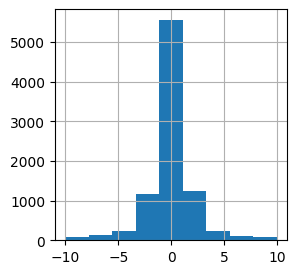

In [ ]:
%%time

fields = [
    #"SimEvent/reactionType",
    "SimEvent/tracks/tracks.startPos",
    "SimEvent/tracks/tracks.stopPos",
    #"SimEvent/tracks/tracks.prim.pID",
    #"SimEvent/tracks/tracks.prim.fourMomentum",
    #"Event/myChargeMap",
    #"Event/myChargeArray*",
    #"SimEvent/tracks/tracks.truncatedStartPosUVWT.*",
    #"SimEvent/tracks/tracks.truncatedStopPosUVWT.*",
]
dataPath = 'drive/MyDrive/ZPS/'
test_files = [dataPath+'out_with_charge_map.root:TPCData']
batchSize = 10000
for array in uproot.iterate(test_files, step_size=batchSize, filter_name=fields, library="ak"):
    df = ak.to_dataframe(array)
    df_part1 = df.loc[(slice(None),0),:]
    df_part2 = df.loc[(slice(None),1),:]
    startXYZ = df_part1["tracks.startPos"]
    stopXYZ_part1 = df_part1["tracks.stopPos"]
    stopXYZ_part2 = df_part2["tracks.stopPos"]

    startXYZ = startXYZ.rename(columns={"fX":"GEN_StartPosX",
                                    "fY":"GEN_StartPosY",
                                    "fZ":"GEN_StartPosZ"}).reset_index(drop=True)

    stopXYZ_part1 = stopXYZ_part1.rename(columns={"fX":"GEN_StopPosX_Part1",
                                    "fY":"GEN_StopPosY_Part1",
                                    "fZ":"GEN_StopPosZ_Part1"}).reset_index(drop=True)

    stopXYZ_part2 = stopXYZ_part2.rename(columns={"fX":"GEN_StopPosX_Part2",
                                    "fY":"GEN_StopPosY_Part2",
                                    "fZ":"GEN_StopPosZ_Part2"}).reset_index(drop=True)

    df_GEN = pd.concat([startXYZ,stopXYZ_part1,stopXYZ_part2], axis=1)

    break


df = pd.concat([df_GEN, df_RECO], axis=1)

#Check datasets compatibility.
df[["GEN_StartPosX","GEN_StartPosY", "RECO_StartPosX", "RECO_StartPosY"]]
(df["GEN_StartPosX"] - df["RECO_StartPosX"]).hist(bins=np.linspace(-10,10,10), figsize=(3,3));

### Resolution plots

2023-05-30 18:13:36.567635: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/scratch_hdd/akalinow/ELITPC/PythonAnalysis/utility_functions.py:69: RuntimeWarning: invalid value encountered in true_divide
  track1 /=norm
/scratch_hdd/akalinow/ELITPC/PythonAnalysis/utility_functions.py:73: RuntimeWarning: invalid value encountered in true_divide
  track2 /=norm


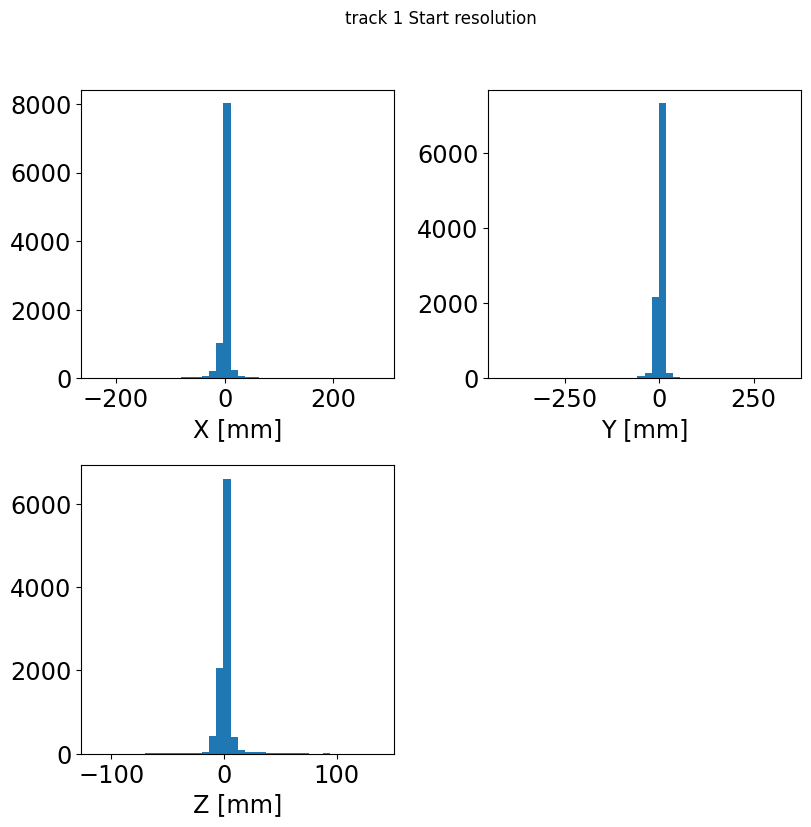

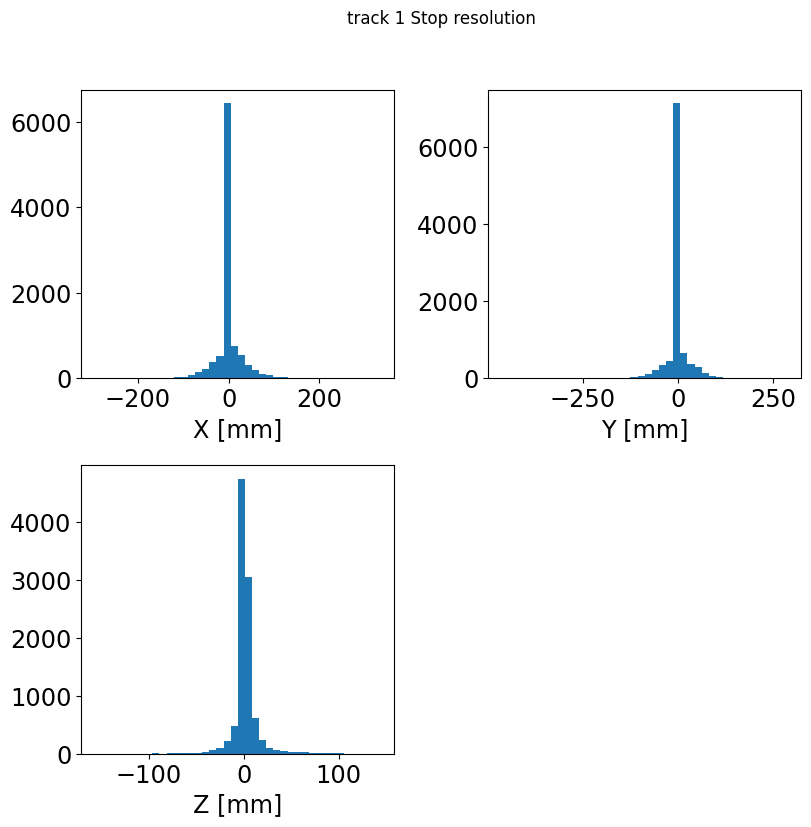

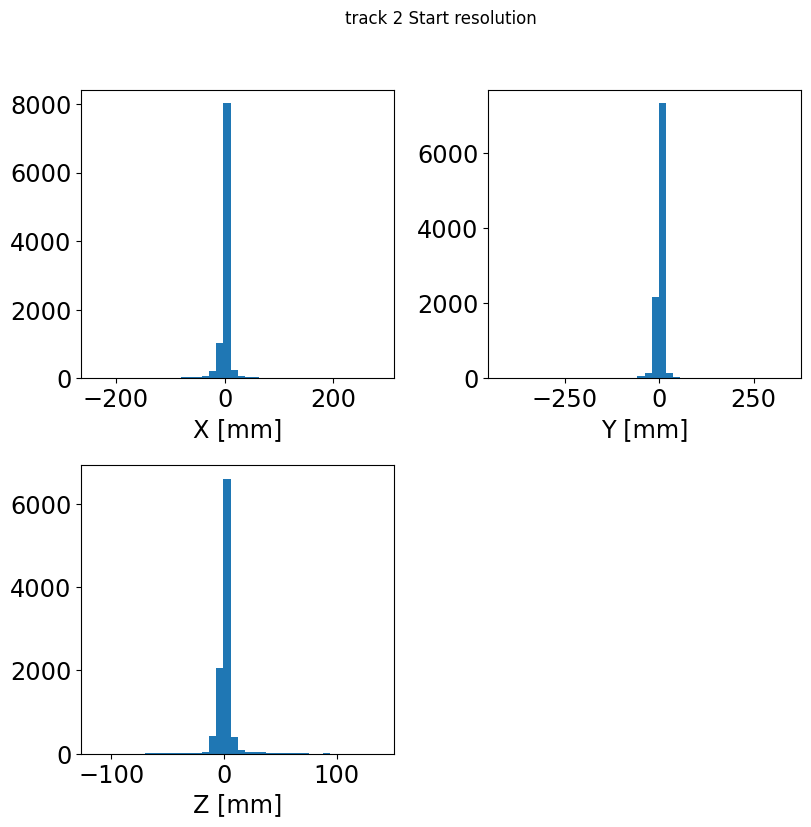

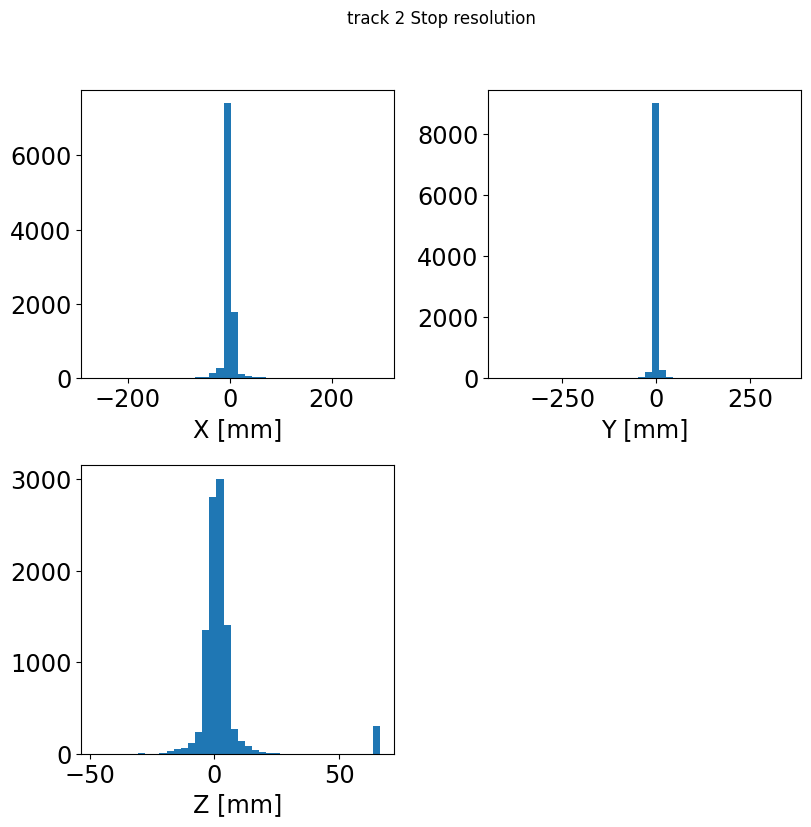

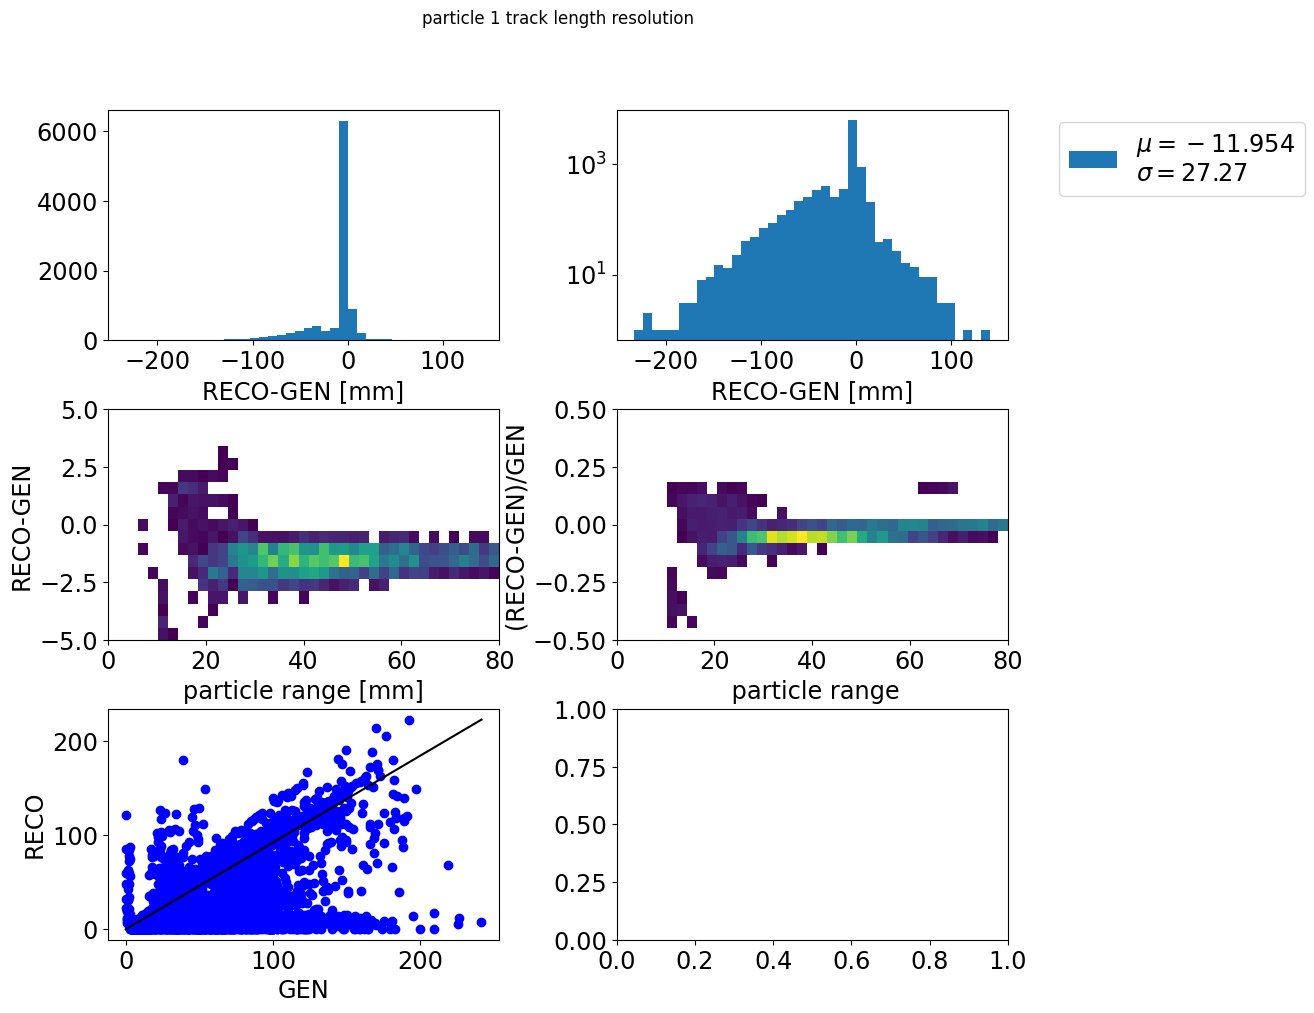

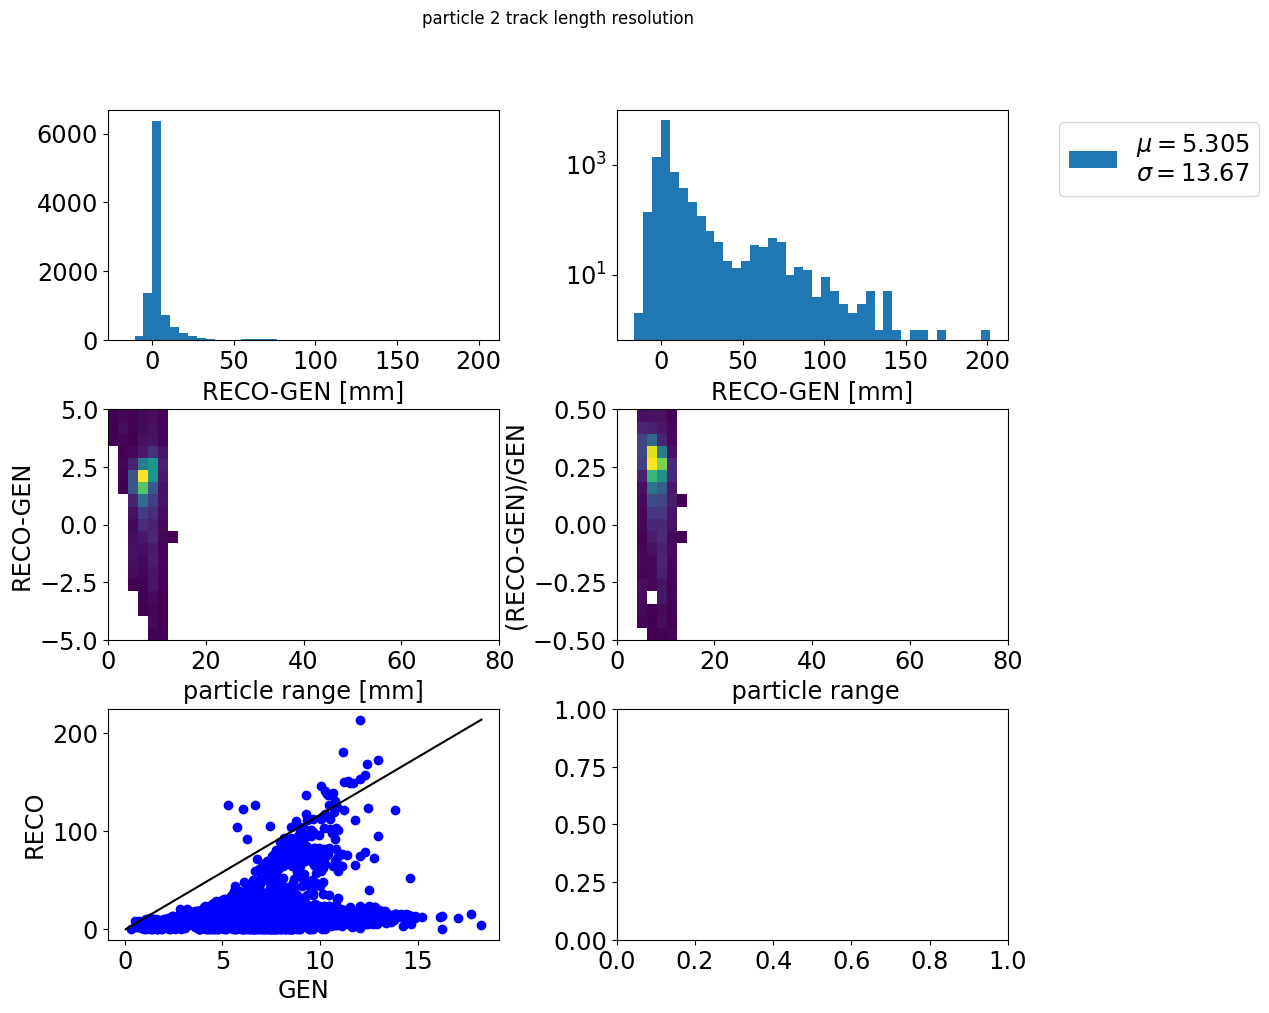

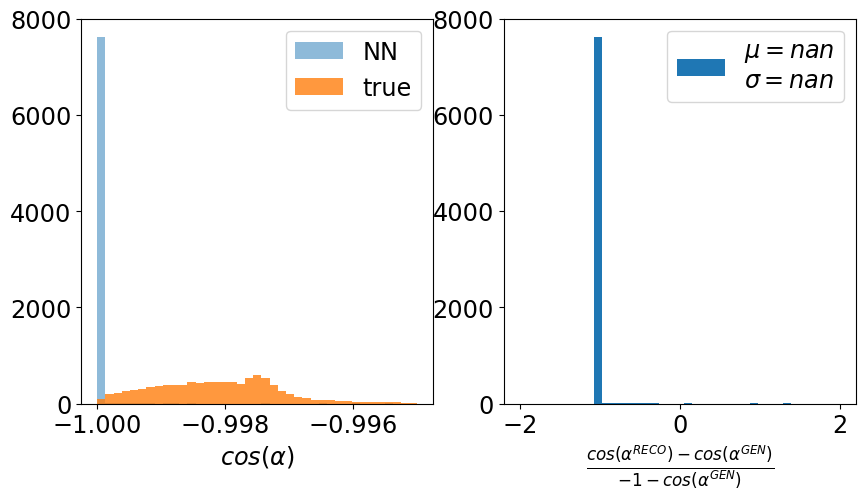

In [ ]:
import plotting_functions as plf
importlib.reload(plf)

#plf.controlPlots(df)
plf.plotEndPointRes(df=df, edge="Start", partIdx=1)
plf.plotEndPointRes(df=df, edge="Stop", partIdx=1)

plf.plotEndPointRes(df=df, edge="Start", partIdx=2)
plf.plotEndPointRes(df=df, edge="Stop", partIdx=2)

plf.plotLengthPull(df, partIdx=1)
plf.plotLengthPull(df, partIdx=2)
plf.plotOpeningAngleCos(df)

### Resolution plots for filtered dataset

       GEN_StartPosX  GEN_StartPosY  GEN_StartPosZ  GEN_StopPosX_Part1  \
count    3973.000000    3973.000000    3973.000000         3973.000000   
mean       -0.729456       0.188882     -54.609349           -1.082256   
std        57.798958       9.893126      14.749582           65.269166   
min       -99.996529     -19.973033     -66.383551         -170.372055   
25%       -49.686856      -7.660975     -62.624263          -51.696549   
50%        -2.488831       0.215862     -60.642763           -1.575275   
75%        50.041765       8.072030     -52.368309           50.465681   
max        99.835882      19.957655      39.048115          173.394670   

       GEN_StopPosY_Part1  GEN_StopPosZ_Part1  GEN_StopPosX_Part2  \
count         3973.000000         3973.000000         3973.000000   
mean            -0.509622          -39.985932           -1.290215   
std             27.978754           26.333758           57.987866   
min           -127.646657         -109.775158         -10

/scratch_hdd/akalinow/ELITPC/PythonAnalysis/utility_functions.py:69: RuntimeWarning: invalid value encountered in true_divide
  track1 /=norm


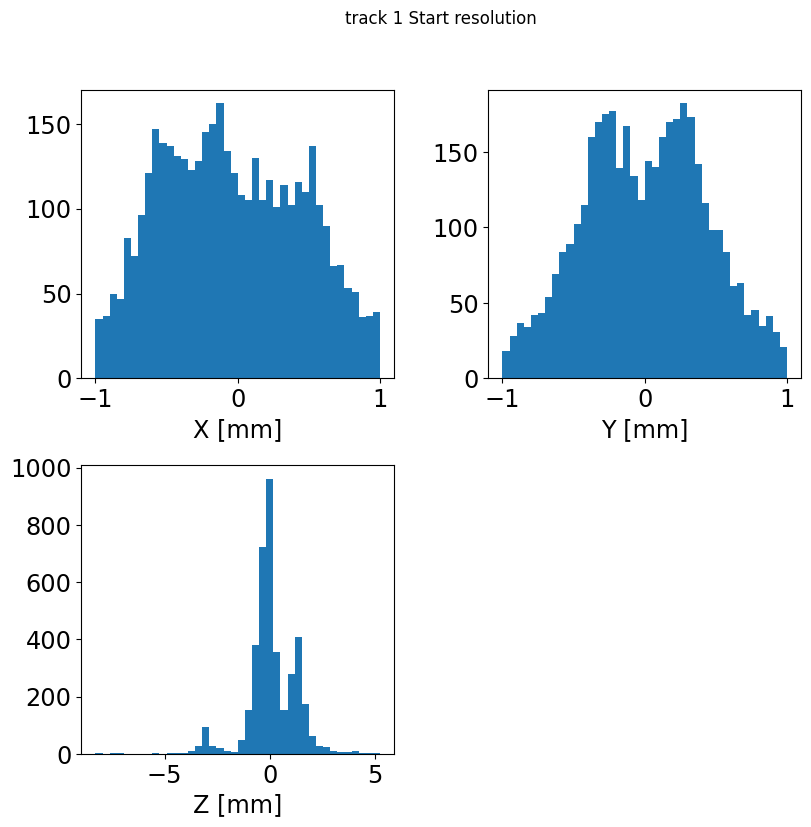

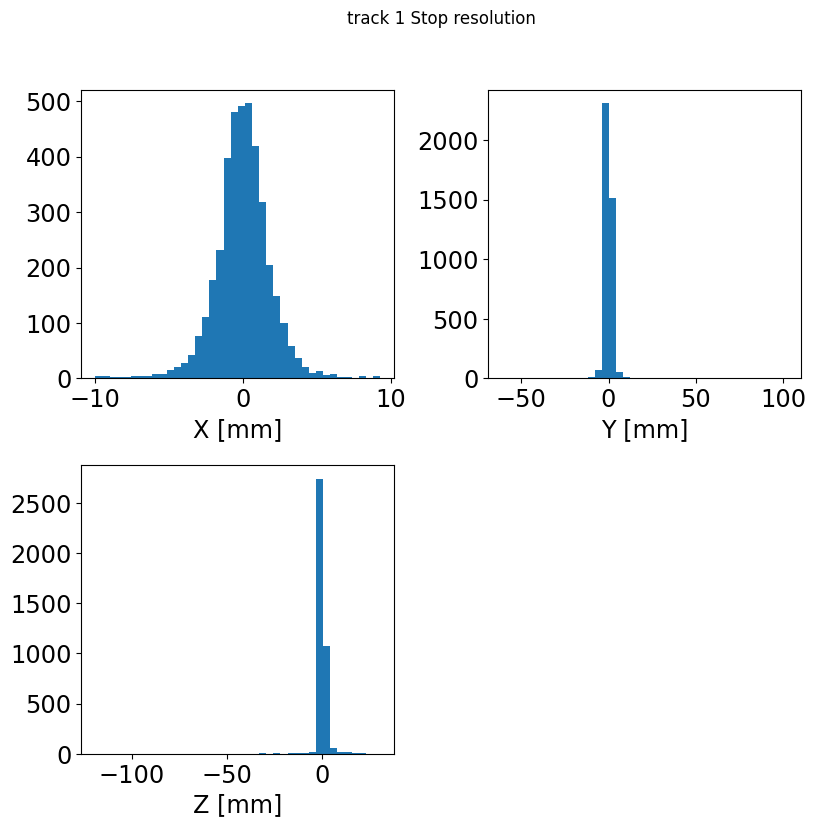

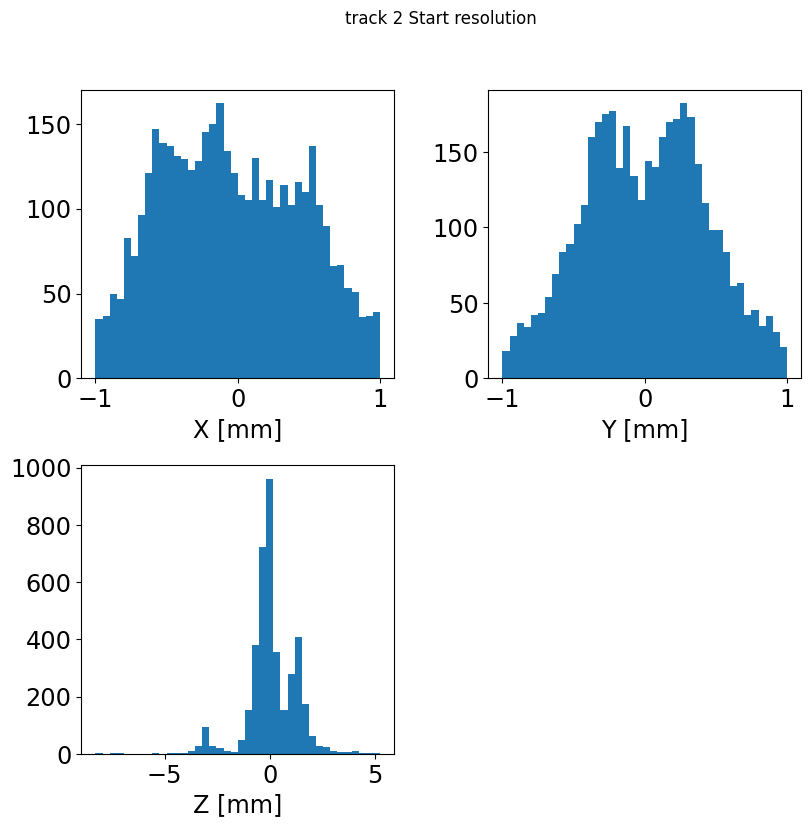

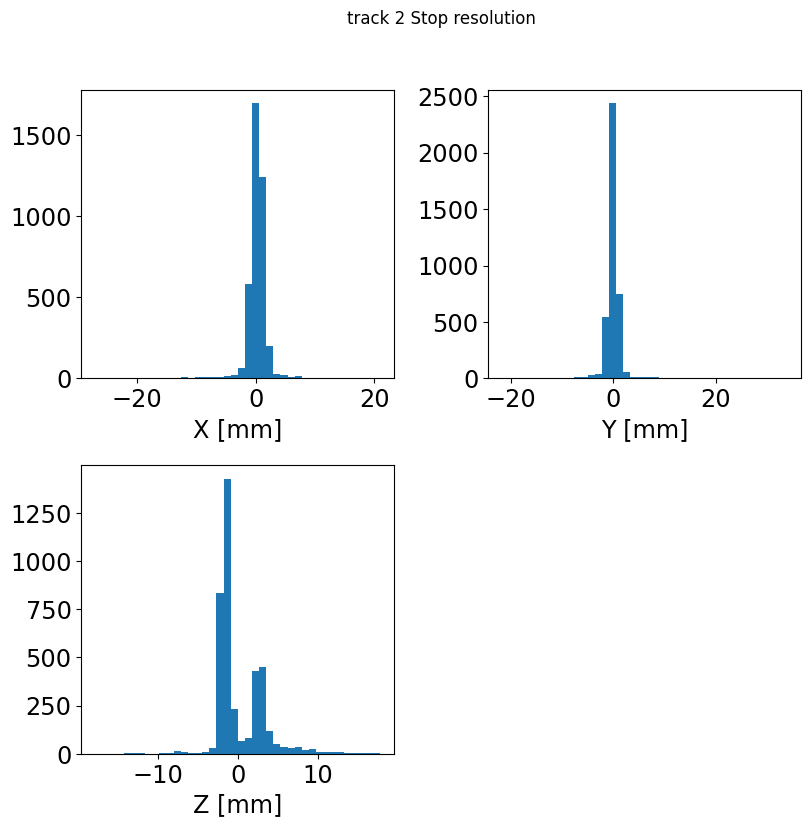

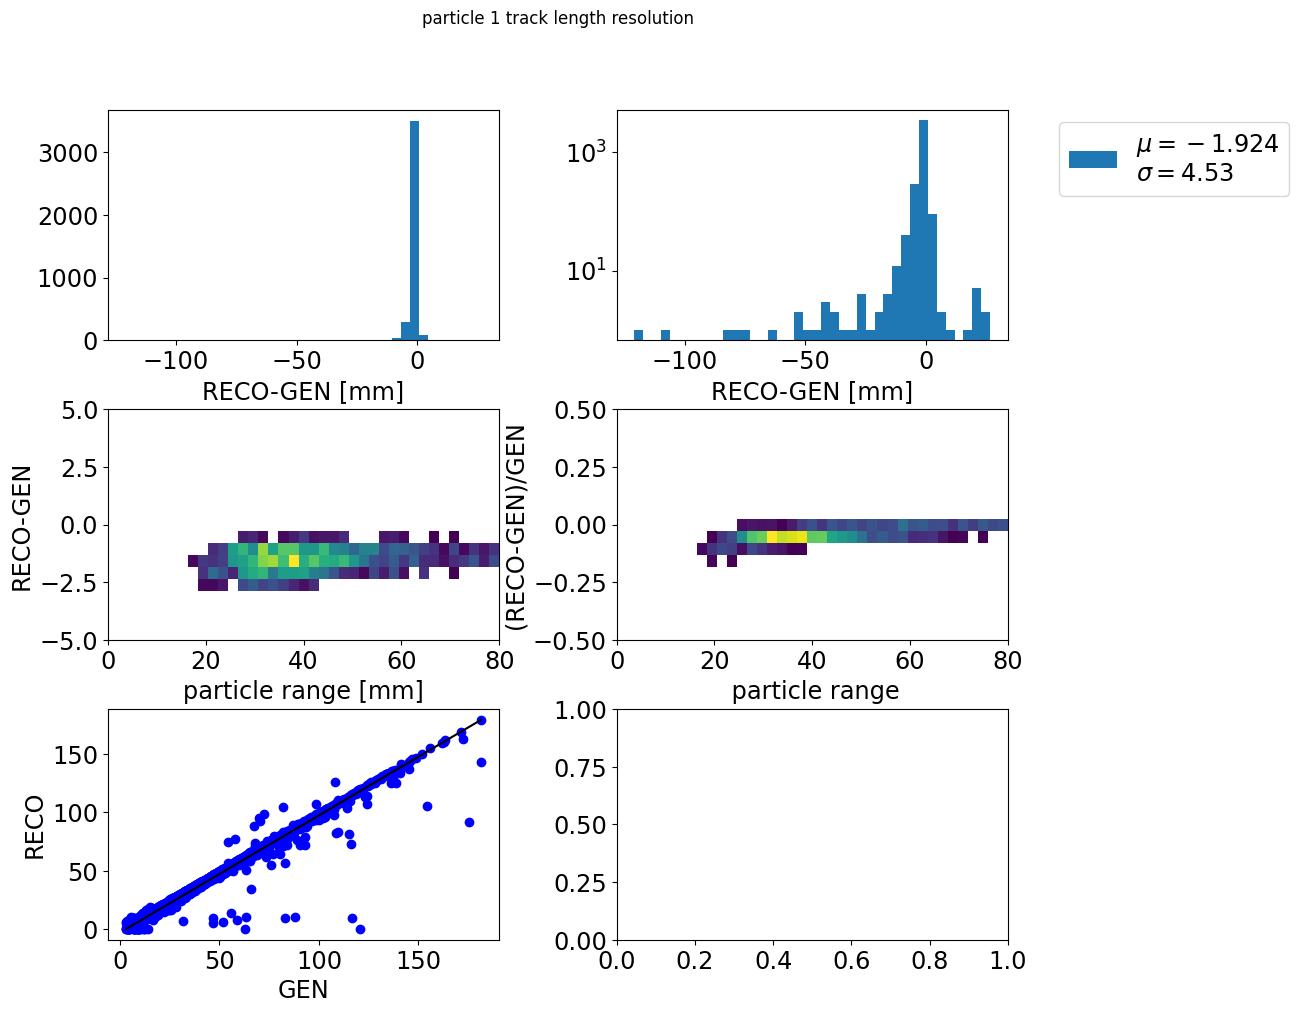

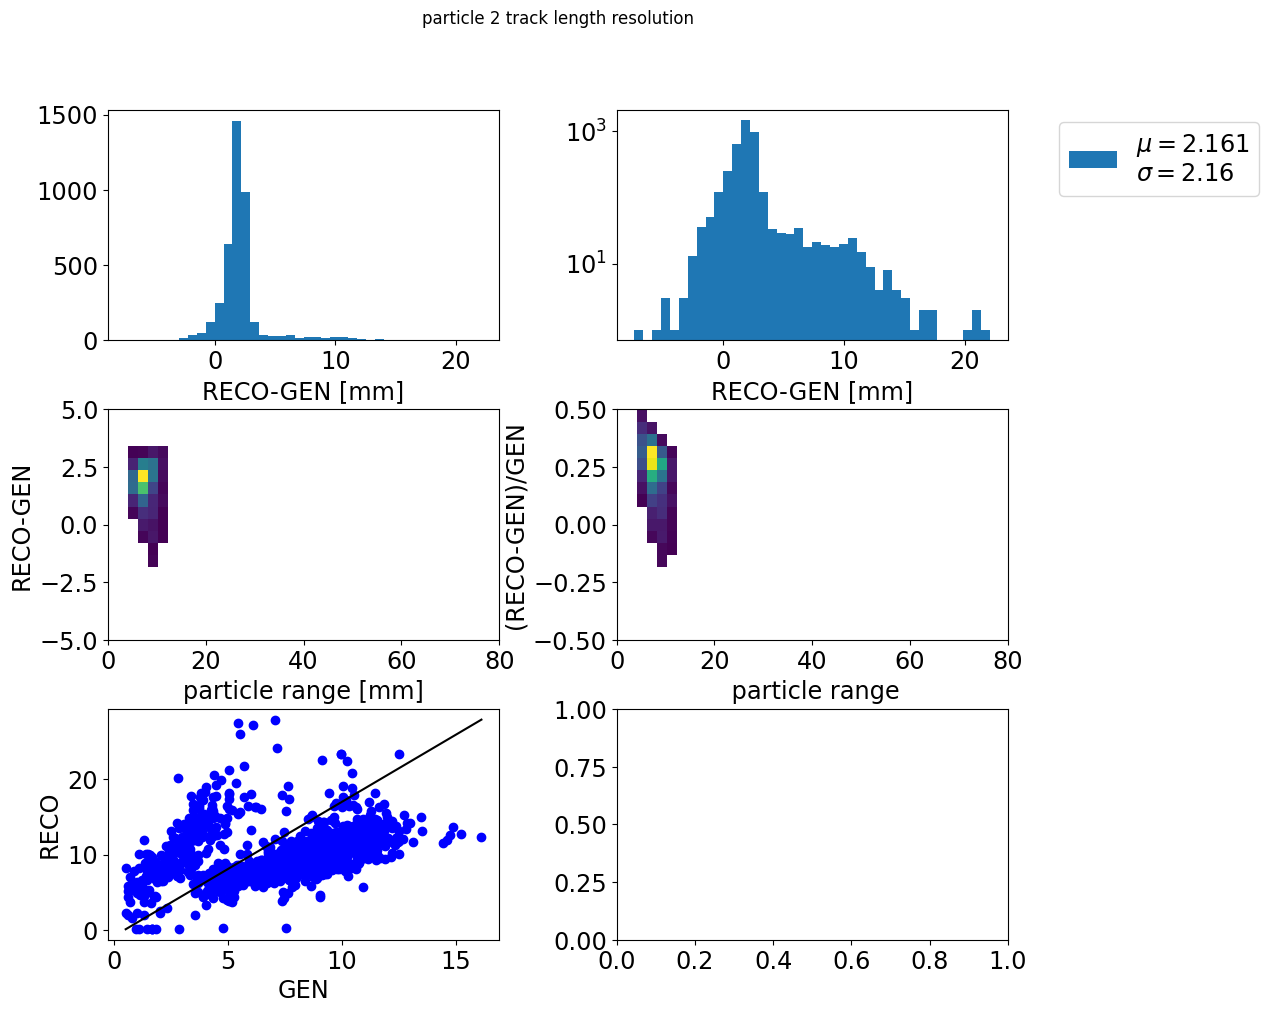

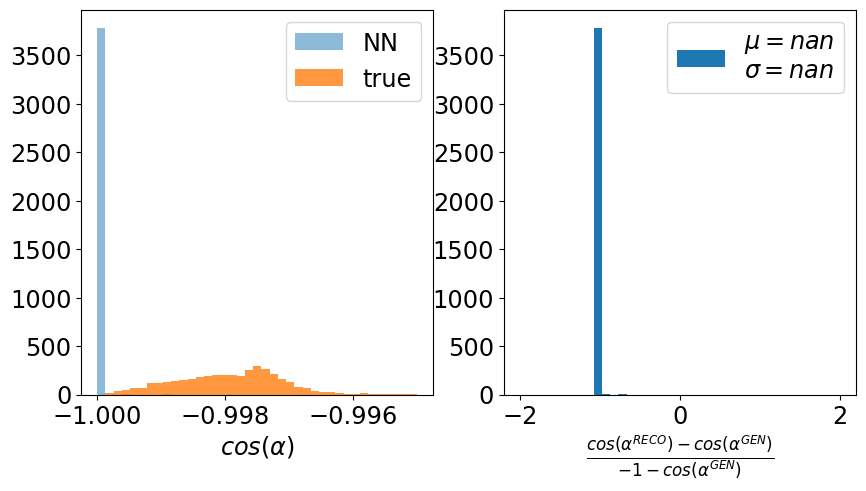

In [ ]:
mask = np.abs(df["GEN_StartPosX"] - df["RECO_StartPosX"])<1
df_filtered = df[mask]

mask = np.abs(df_filtered["GEN_StartPosY"] - df_filtered["RECO_StartPosY"])<1
df_filtered = df_filtered[mask]

mask = np.abs(df_filtered["GEN_StopPosX_Part1"] - df_filtered["RECO_StopPosX_Part1"])<10
df_filtered = df_filtered[mask]

print(df_filtered.describe())

plf.plotEndPointRes(df=df_filtered, edge="Start", partIdx=1)
plf.plotEndPointRes(df=df_filtered, edge="Stop", partIdx=1)

plf.plotEndPointRes(df=df_filtered, edge="Start", partIdx=2)
plf.plotEndPointRes(df=df_filtered, edge="Stop", partIdx=2)

plf.plotLengthPull(df_filtered, partIdx=1)
plf.plotLengthPull(df_filtered, partIdx=2)
plf.plotOpeningAngleCos(df_filtered)

## 2D plots

KeyError: 'alphaRangeGen'

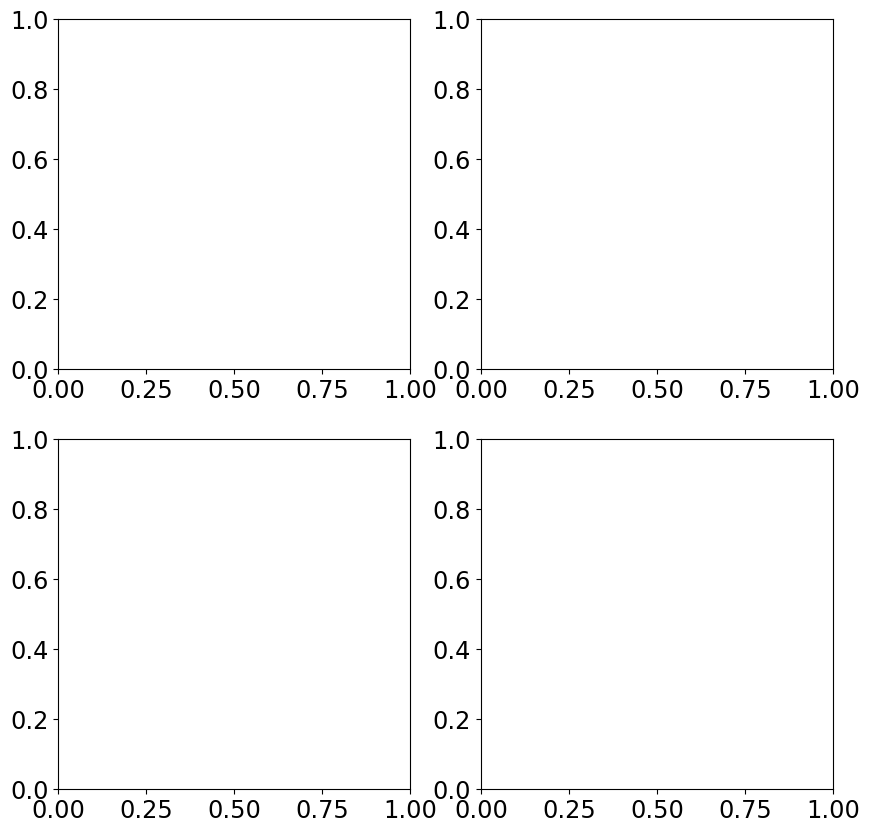

In [ ]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (14, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         #'xticks':'major_ticks_top'
         }

plt.rcParams.update(params)


fig, axes = plt.subplots(2, 2, figsize = (10, 10))

'''
trackTree->Draw("(alphaRangeReco-alphaRangeGen)/alphaRangeGen:alphaRangeGen>>hRangeResVsRangeGen(21,0, 70,  41,-0.5,0.5)","","goff");
trackTree->Draw("(alphaRangeReco-alphaRangeGen)/alphaRangeGen:cosThetaGen>>hRangeResVsCosTheta(21,-1, 1,  41,-0.5,0.5)","","goff");
trackTree->Draw("abs(cosThetaReco)-abs(cosThetaGen):cosThetaGen>>hCosThetaResVsCosTheta(21,-1, 1,  41,-0.5,0.5)","","goff");
trackTree->Draw("asin(sin(phiReco-phiGen)):cosThetaGen>>hPhiResVsCosTheta(21,-1, 1,  41,-0.5,0.5)","","goff");
trackTree->Draw("(chargeReco-chargeGen)/chargeGen:cosThetaGen>>hChargeResVsCosTheta(21,-1, 1,  41,-0.5,0.5)","","goff");
'''

x = df["alphaRangeGen"]
y = df.eval("(alphaRangeReco -alphaRangeGen)/alphaRangeGen")
xBins = np.linspace(0,60,20)
yBins = np.linspace(-0.5,0.5,20)
axes[0,0].hist2d(x, y, bins=(xBins, yBins), cmin=10, label="length")
axes[0,0].set_xlabel(r'$\alpha~range [mm]$')
axes[0,0].set_ylabel(r'$\frac{RECO-GEN}{GEN}$')

x = df["cosThetaGen"]
xBins = np.linspace(-1,1,20)
yBins = np.linspace(-0.5,0.5,20)
axes[0,1].hist2d(x, y, bins=(xBins, yBins), cmin=10, label="length")
axes[0,1].set_xlabel(r'$\cos(\theta)$')
axes[0,1].set_ylabel(r'$\frac{RECO-GEN}{GEN}$')

x = df["phiGen"]
xBins = np.linspace(-np.pi,np.pi,20)
yBins = np.linspace(-0.5,0.5,20)
axes[1,0].hist2d(x, y, bins=(xBins, yBins), cmin=10, label="length")
axes[1,0].set_xlabel(r'$\varphi$')
axes[1,0].set_ylabel(r'$\frac{RECO-GEN}{GEN}$')

x = df["dEdxFitChi2"]
xBins = np.linspace(x.min(),x.median(),20)
yBins = np.linspace(-0.5,0.5,20)
axes[1,1].hist2d(x, y, bins=(xBins, yBins), cmin=10, label="length")
axes[1,1].set_xlabel(r'$\frac{dE}{dx}$ fit loss func.')
axes[1,0].set_ylabel(r'$\frac{RECO-GEN}{GEN}$')

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.35, hspace=0.3)
#plt.savefig("drive/MyDrive/ZPS/fig_png/2D_plots.png", bbox_inches="tight")